
Welcome to Personal Expense Tracker!
1. Add an Expense
2. View All Expenses
3. Generate Report
4. Visualize Expenses
5. Save and Exit
Enter your choice: 2

Date		Category	Description		Amount
--------------------------------------------------
--------------------------------------------------

Welcome to Personal Expense Tracker!
1. Add an Expense
2. View All Expenses
3. Generate Report
4. Visualize Expenses
5. Save and Exit
Enter your choice: 1
Enter the date (YYYY-MM-DD): 2024-11-12
Enter the category (e.g., Food, Rent, Entertainment): entertainment
Enter a short description: tv
Enter the amount: 20000
Expense added successfully!

Welcome to Personal Expense Tracker!
1. Add an Expense
2. View All Expenses
3. Generate Report
4. Visualize Expenses
5. Save and Exit
Enter your choice: 1
Enter the date (YYYY-MM-DD): 2024-11-13
Enter the category (e.g., Food, Rent, Entertainment): rent
Enter a short description: house
Enter the amount: 10000
Expense added successfully!

Welcome to Personal

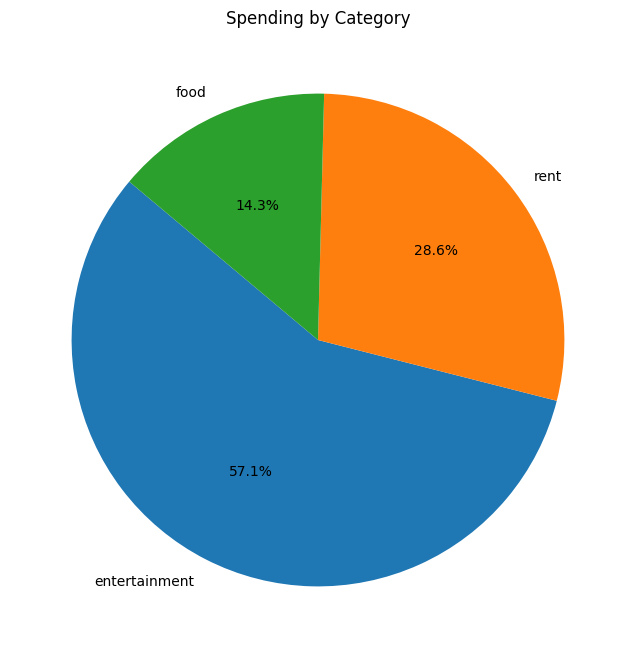


Welcome to Personal Expense Tracker!
1. Add an Expense
2. View All Expenses
3. Generate Report
4. Visualize Expenses
5. Save and Exit
Enter your choice: 5
Expenses saved. Goodbye!


In [ ]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

FILE_NAME = "expenses.csv"

# Load expenses from CSV file
def load_expenses():
    expenses = []
    try:
        with open(FILE_NAME, mode='r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                expenses.append({
                    "date": row["Date"],
                    "category": row["Category"],
                    "description": row["Description"],
                    "amount": float(row["Amount"])
                })
    except FileNotFoundError:
        pass  # No file found, start with an empty list
    return expenses

# Save expenses to CSV file
def save_expenses(expenses):
    with open(FILE_NAME, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=["Date", "Category", "Description", "Amount"])
        writer.writeheader()
        for expense in expenses:
            writer.writerow({
                "Date": expense["date"],
                "Category": expense["category"],
                "Description": expense["description"],
                "Amount": expense["amount"]
            })

# Function to add an expense
def add_expense(expenses):
    date = input("Enter the date (YYYY-MM-DD): ")
    category = input("Enter the category (e.g., Food, Rent, Entertainment): ")
    description = input("Enter a short description: ")
    amount = float(input("Enter the amount: "))
    expenses.append({"date": date, "category": category, "description": description, "amount": amount})
    print("Expense added successfully!")

# Function to view all expenses
def view_expenses(expenses):
    print("\nDate\t\tCategory\tDescription\t\tAmount")
    print("-" * 50)
    for expense in expenses:
        print(f"{expense['date']}\t{expense['category']}\t{expense['description']}\t${expense['amount']:.2f}")
    print("-" * 50)

# Function to generate a report by category
def generate_report(expenses):
    expenses_by_category = {}
    total_spent = 0

    for expense in expenses:
        category = expense["category"]
        amount = expense["amount"]
        expenses_by_category[category] = expenses_by_category.get(category, 0) + amount
        total_spent += amount

    print("\nExpense Report by Category")
    print("-" * 30)
    for category, total in expenses_by_category.items():
        print(f"{category}: ${total:.2f}")
    print(f"\nTotal Spending: ${total_spent:.2f}")

# Function to visualize spending by category
def visualize_expenses(expenses):
    expenses_by_category = {}
    for expense in expenses:
        category = expense["category"]
        amount = expense["amount"]
        expenses_by_category[category] = expenses_by_category.get(category, 0) + amount

    categories = list(expenses_by_category.keys())
    amounts = list(expenses_by_category.values())

    plt.figure(figsize=(8, 8))
    plt.pie(amounts, labels=categories, autopct='%1.1f%%', startangle=140)
    plt.title("Spending by Category")
    plt.show()

# Main menu loop
def main():
    expenses = load_expenses()

    while True:
        print("\nWelcome to Personal Expense Tracker!")
        print("1. Add an Expense")
        print("2. View All Expenses")
        print("3. Generate Report")
        print("4. Visualize Expenses")
        print("5. Save and Exit")

        choice = input("Enter your choice: ")

        if choice == "1":
            add_expense(expenses)
        elif choice == "2":
            view_expenses(expenses)
        elif choice == "3":
            generate_report(expenses)
        elif choice == "4":
            visualize_expenses(expenses)
        elif choice == "5":
            save_expenses(expenses)
            print("Expenses saved. Goodbye!")
            break
        else:
            print("Invalid choice. Please choose again.")

if __name__ == "__main__":
    main()